In [2]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# Importing your data
dfas = pd.read_csv('./projects/project-3/data/df_2000.csv')
df = pd.read_csv('./projects/project-3/data/df_2000.csv')
df = pd.read_csv('./projects/project-3/data/df_2000.csv')
df = pd.read_csv('./projects/project-3/data/df_2000.csv')

FileNotFoundError: [Errno 2] No such file or directory: './projects/project-3/data/df_2000.csv'

In [ ]:
# Reassuring our shapes and sizes
dfas.shape, dfac.shape, dfds.shape, dfdc.shape

In [546]:
# Taking a look at our scrapped texts.
dfas['selftext']

0      tw mention of self harm\n\n&amp;#x200B;\n\n&am...
1      Specifically those first few months where the ...
2       I have neighbour. It is not so loud, but time...
3                                              [deleted]
4      anxiety off balance feeling sensitivity to lig...
                             ...                        
995    Posting this is a terrible idea.\n\nFirstly, b...
996    I have no issue talking on the phone, hell it'...
997    Slight TW: mention of abusers\n\nFirst point, ...
998                                            [deleted]
999    I am in the 60-120 range. I have a lot of deat...
Name: selftext, Length: 1000, dtype: object

In [547]:
# Combine title and selftext into a single column
dfas['body'] = dfas['selftext'].astype(str)
dfds['body'] = dfds['selftext'].astype(str)

#Change 'Anxiety' for a binary to be predicted later
dfas['subreddit'] = dfas['subreddit'].replace('Anxiety', 1)
dfas['origin'] = 'submission'
dfac['subreddit'] = dfac['subreddit'].replace('Anxiety', 1)
dfac['origin'] = 'comment'
#Change 'Anxiety' for a binary to be predicted later
dfds['subreddit'] = dfds['subreddit'].replace('diabetes', 0)
dfds['origin'] = 'submission'
dfdc['subreddit'] = dfdc['subreddit'].replace('diabetes', 0)
dfdc['origin'] = 'comment'

In [548]:
# Selecting only the necessary columns
dfas = dfas[['author', 'origin', 'id', 'body',  'score', 'created_utc', 'subreddit']]
dfac = dfac[['author','origin', 'id','body', 'score', 'created_utc', 'subreddit']]
dfds = dfds[['author', 'origin', 'id', 'body',  'score', 'created_utc', 'subreddit']]
dfdc = dfdc[['author','origin', 'id', 'body', 'score', 'created_utc', 'subreddit']]

# Merge it into one dataframe
df_anx = dfas.append(dfac)
df_diab = dfds.append(dfdc)
df = df_anx.append(df_diab, ignore_index=True)

In [549]:
df['body'] = [str(x).replace('\n\n',' ') for x in df["body"]]
df['body'] = [str(x).replace('\n',' ') for x in df["body"]]
df['body'] = [str(x).replace('&amp','') for x in df["body"]]
df['body'] = [str(x).replace(';#x200B;','') for x in df["body"]]
df['body'] = [str(x).replace('*','') for x in df["body"]]
df['body'] = [str(x).lower() for x in df["body"]]

# Making a date column from created utc
df['datetime'] = pd.to_datetime(df['created_utc'], unit = 's').dt.date
df['time'] = pd.to_datetime(df['created_utc'], unit = 's').dt.time

In [550]:
# Dropping out Nans and duplicates if any
df = df.dropna(how='any')
df.drop_duplicates(subset=['body', 'subreddit'], inplace = True)

# Checking how much was dropped
df.shape

(3545, 9)

In [551]:
# Take an overall look of your dataframe
df.head()

,author,origin,id,body,score,created_utc,subreddit,datetime,time
0,International-Area61,submission,jw52ck,tw mention of self harm my anxiety has...,1,1605658540,1,2020-11-18,00:15:40
1,henlodarkness123,submission,jw4tg3,specifically those first few months where the ...,1,1605657680,1,2020-11-18,00:01:20
2,Morgotheron,submission,jw4l5d,"i have neighbour. it is not so loud, but time...",1,1605656878,1,2020-11-17,23:47:58
3,[deleted],submission,jw4gpr,[deleted],1,1605656470,1,2020-11-17,23:41:10
4,bigdaddyloma,submission,jw4f34,anxiety off balance feeling sensitivity to lig...,3,1605656316,1,2020-11-17,23:38:36


In [553]:
# find specific deleted texts
df[df['body']=='[deleted]']

,author,origin,id,body,score,created_utc,subreddit,datetime,time
3,[deleted],submission,jw4gpr,[deleted],1,1605656470,1,2020-11-17,23:41:10
2214,[deleted],submission,jw256h,[deleted],1,1605649087,0,2020-11-17,21:38:07


In [554]:
#df.index[18899]

In [555]:
#df = df.drop([df.index[3], df.index[18899]],axis = 0)

In [557]:
diamonds = "𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫𒐫"

In [558]:
jap = 'さようなら'

In [559]:
df[df['body'] == 'you'].index

Int64Index([], dtype='int64')

In [560]:
df['body'].dropna(inplace=True)

In [561]:
df.shape

(3545, 9)

### Instantiate and create new columns for tokenized words

In [562]:
# sentence tokenizer
df['sent_tokenized'] = df["body"].apply(nltk.sent_tokenize)

In [563]:
# Instantiate tokenizer.
tokenizer = RegexpTokenizer('\s+', gaps=True)

In [564]:
# Run tokenizer.
df['tokens'] = df["body"].apply(tokenizer.tokenize)

In [565]:
len(df['tokens'][0])

132

In [566]:
# Instantiate lemmatizer. 
lemmatizer = WordNetLemmatizer()

In [567]:
# Lemmatize tokens.
df['tokens_lem'] = [lemmatizer.lemmatize(str(i)) for i in df['tokens']]

In [568]:
# Remove stopwords from "tokens."
df['no_stop_words'] = [word for word in df['tokens_lem'] if word not in stopwords.words('english')]
df['no_stop_words']

0       ['tw', 'mention', 'of', 'self', 'harm', 'my', ...
1       ['specifically', 'those', 'first', 'few', 'mon...
2       ['i', 'have', 'neighbour.', 'it', 'is', 'not',...
3                                           ['[deleted]']
4       ['anxiety', 'off', 'balance', 'feeling', 'sens...
                              ...                        
3995    ['drastically', 'changing', 'blood', 'sugars',...
3996    ['i’m', 'a', 'week', 'late,', 'but', 'as', 'so...
3997    ['holy', 'crap', 'that', 'sounds', 'awesome', ...
3998    ['i‘m', 'not', 'that', 'expierienced', 'yet', ...
3999    ['even', 'for', 'peace', 'of', 'mind,', 'i', '...
Name: no_stop_words, Length: 3545, dtype: object

In [569]:
df.head(2)

,author,origin,id,body,score,created_utc,subreddit,datetime,time,sent_tokenized,tokens,tokens_lem,no_stop_words
0,International-Area61,submission,jw52ck,tw mention of self harm my anxiety has...,1,1605658540,1,2020-11-18,00:15:40,[tw mention of self harm my anxiety ha...,"[tw, mention, of, self, harm, my, anxiety, has...","['tw', 'mention', 'of', 'self', 'harm', 'my', ...","['tw', 'mention', 'of', 'self', 'harm', 'my', ..."
1,henlodarkness123,submission,jw4tg3,specifically those first few months where the ...,1,1605657680,1,2020-11-18,00:01:20,[specifically those first few months where the...,"[specifically, those, first, few, months, wher...","['specifically', 'those', 'first', 'few', 'mon...","['specifically', 'those', 'first', 'few', 'mon..."


### Exploring most common-words
Curiosity on word count and length of words, before words were tokenized, lemmatized, removed stop words

#### 1st on clean words

In [570]:
df['length'] = df['no_stop_words'].apply(len)

In [571]:
df['word_count'] = df['no_stop_words'].apply(lambda x: len(x.split()))

In [572]:
df[['length', 'word_count']].describe()

,length,word_count
count,3545.000000,3545.000000
mean,751.518759,89.899859
std,1032.647015,122.391041
min,5.000000,1.000000
25%,174.000000,21.000000
50%,441.000000,52.000000
75%,937.000000,113.000000
max,14704.000000,1781.000000


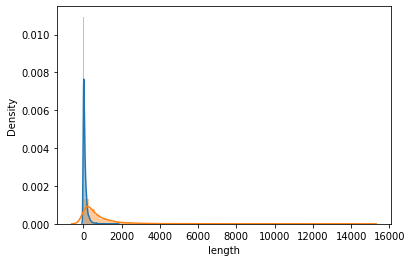

In [573]:
sns.distplot(df.word_count, norm_hist = True)
sns.distplot(df.length, norm_hist = True);

#### Original body of texts

In [574]:
df['length_body'] = df['body'].apply(len)

In [575]:
df['word_count_body'] = df['body'].apply(lambda x: len(x.split()))

In [576]:
df[['length_body', 'word_count_body']].describe()

,length_body,word_count_body
count,3545.000000,3545.000000
mean,481.834415,89.899859
std,669.909761,122.391041
min,1.000000,1.000000
25%,111.000000,21.000000
50%,281.000000,52.000000
75%,600.000000,113.000000
max,9557.000000,1781.000000


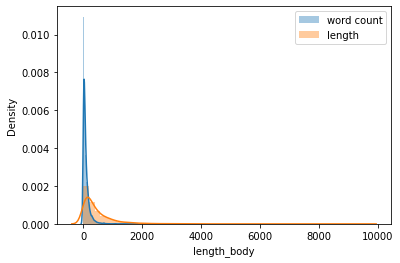

In [577]:
sns.distplot(df.word_count_body, norm_hist = True, label = "word count")
sns.distplot(df.length_body, norm_hist = True, label = 'length')
plt.legend();

### Count Vectorizer on each subreddit and both

#### Anxiety = 1 | Diabetes = 0

In [578]:
# Separating to Anxiety Dataframe and Diabetes Dataframe
anx = df[df['subreddit'] == 1]
dia = df[df['subreddit'] == 0]
anx.head()

,author,origin,id,body,score,created_utc,subreddit,datetime,time,sent_tokenized,tokens,tokens_lem,no_stop_words,length,word_count,length_body,word_count_body
0,International-Area61,submission,jw52ck,tw mention of self harm my anxiety has...,1,1605658540,1,2020-11-18,00:15:40,[tw mention of self harm my anxiety ha...,"[tw, mention, of, self, harm, my, anxiety, has...","['tw', 'mention', 'of', 'self', 'harm', 'my', ...","['tw', 'mention', 'of', 'self', 'harm', 'my', ...",1061,132,673,132
1,henlodarkness123,submission,jw4tg3,specifically those first few months where the ...,1,1605657680,1,2020-11-18,00:01:20,[specifically those first few months where the...,"[specifically, those, first, few, months, wher...","['specifically', 'those', 'first', 'few', 'mon...","['specifically', 'those', 'first', 'few', 'mon...",668,78,433,78
2,Morgotheron,submission,jw4l5d,"i have neighbour. it is not so loud, but time...",1,1605656878,1,2020-11-17,23:47:58,"[ i have neighbour., it is not so loud, but ti...","[i, have, neighbour., it, is, not, so, loud,, ...","['i', 'have', 'neighbour.', 'it', 'is', 'not',...","['i', 'have', 'neighbour.', 'it', 'is', 'not',...",890,113,565,113
3,[deleted],submission,jw4gpr,[deleted],1,1605656470,1,2020-11-17,23:41:10,[[deleted]],[[deleted]],['[deleted]'],['[deleted]'],13,1,9,1
4,bigdaddyloma,submission,jw4f34,anxiety off balance feeling sensitivity to lig...,3,1605656316,1,2020-11-17,23:38:36,[anxiety off balance feeling sensitivity to li...,"[anxiety, off, balance, feeling, sensitivity, ...","['anxiety', 'off', 'balance', 'feeling', 'sens...","['anxiety', 'off', 'balance', 'feeling', 'sens...",1069,128,684,128


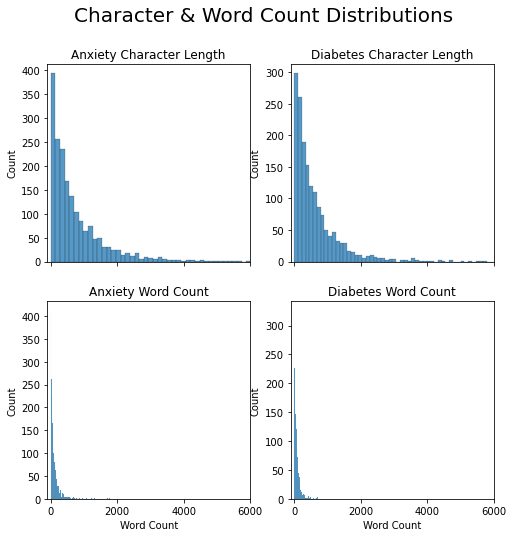

In [597]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex = True)
sns.histplot(anx['length'], ax=ax[0,0])
sns.histplot(dia['length'], ax=ax[0,1])
sns.histplot(anx['word_count'], ax=ax[1,0])
sns.histplot(dia['word_count'], ax=ax[1,1])

ax[0,0].set(xlabel='Length',xlim=[-100,6_000], title='Anxiety Character Length')
ax[0,1].set(xlabel='Length',xlim=[-100,6_000], title='Diabetes Character Length')
ax[1,0].set(xlabel='Word Count', xlim=[-100,6_000], title='Anxiety Word Count')
ax[1,1].set(xlabel='Word Count', xlim=[-100,6_000], title='Diabetes Word Count')

fig.suptitle('Character & Word Count Distributions', fontsize=20);

In [580]:
anx['word_count'].describe()

count    1889.000000
mean      101.525146
std       144.373950
min         1.000000
25%        22.000000
50%        57.000000
75%       128.000000
max      1781.000000
Name: word_count, dtype: float64

In [581]:
dia['word_count'].describe()

count    1656.000000
mean       76.638889
std        89.266613
min         1.000000
25%        20.000000
50%        47.500000
75%        99.000000
max       708.000000
Name: word_count, dtype: float64

Comparing word Count distributions of anxiety and diabetes throughout subreddits since November 2020.
Evidence shows little significance in word count and characters. However anxiety subreddit has a higher average of 101 words and diabetes with an average of 76 words.

### Looking at top words used in each subreddit

In [582]:
# Extending my list of stop words
stop_words = stopwords.words("english")
new_stop_words = ['like', 'just', 'don', 've', 'know', 'time', 'really', 
                'want', 'people', 'going', 'think', 'make', 'day', 
                'https', 'com', 'much', 'something', 'would', 'go',
               'even', 'things', 'also', 'got', 'www', 'could', 'take', 'anxiety', 'diabetes']
stop_words.extend(new_stop_words)

In [583]:
cv = CountVectorizer(stop_words= stop_words)
anx_vect = cv.fit_transform(anx['no_stop_words'])
anx_vect_df = pd.DataFrame(anx_vect.todense(), columns = cv.get_feature_names())

In [584]:
dia_vect = cv.fit_transform(dia['no_stop_words'])
dia_vect_df = pd.DataFrame(dia_vect.todense(), columns = cv.get_feature_names())

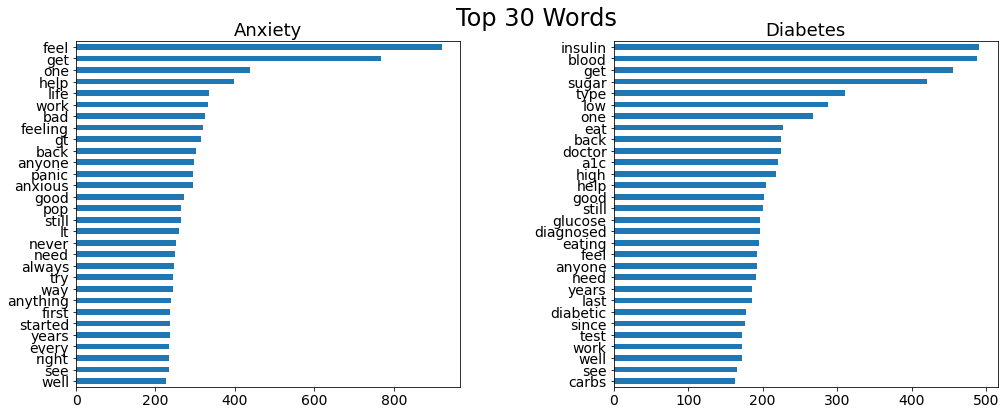

In [585]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
anx_vect_df.sum().sort_values(ascending=False).head(30).plot(kind='barh', ax=ax[0], fontsize=14)
dia_vect_df.sum().sort_values(ascending=False).head(30).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('Anxiety', fontsize=18)
ax[1].set_title('Diabetes', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 30 Words', fontsize=24)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

#### Looking at Least 30 Words used

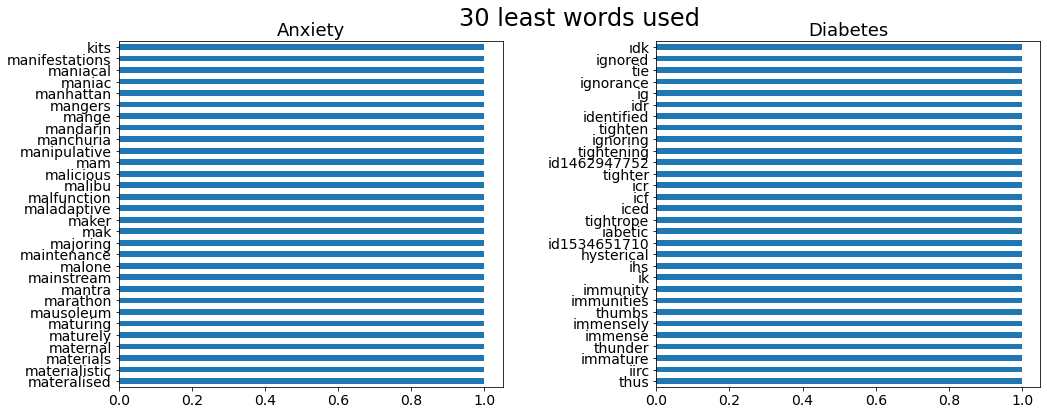

In [586]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
anx_vect_df.sum().sort_values(ascending=True).head(30).plot(kind='barh', ax=ax[0], fontsize=14)
dia_vect_df.sum().sort_values(ascending=True).head(30).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('Anxiety', fontsize=18)
ax[1].set_title('Diabetes', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('30 least words used', fontsize=24)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

#### Looking at Top 20 Coupled Words

In [587]:
cv = CountVectorizer(stop_words= stop_words, ngram_range = (2, 2))
anx_vect = cv.fit_transform(anx['no_stop_words'])
anx_vect_df = pd.DataFrame(anx_vect.todense(), columns = cv.get_feature_names())

In [588]:
dia_vect = cv.fit_transform(dia['no_stop_words'])
dia_vect_df = pd.DataFrame(dia_vect.todense(), columns = cv.get_feature_names())

In [589]:
#fig.text(0.5, 0.04, 'Number of Occurances', ha='center', fontsize=18)

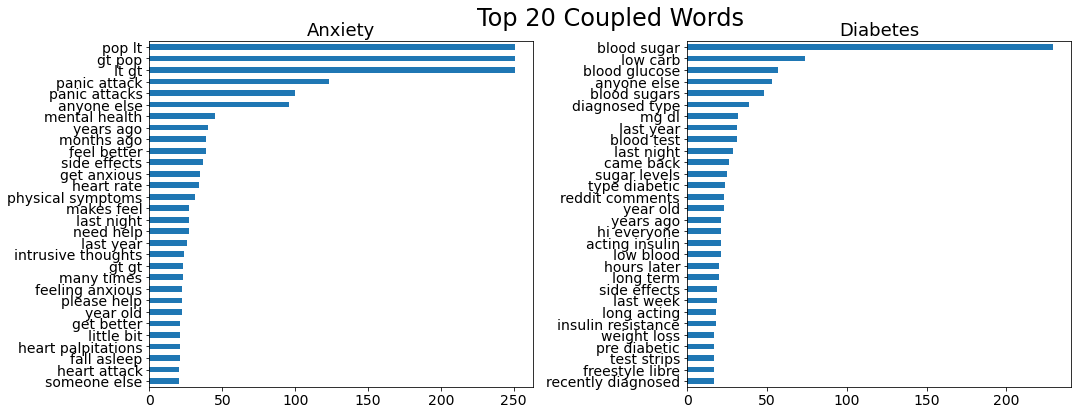

In [590]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
anx_vect_df.sum().sort_values(ascending=False).head(30).plot(kind='barh', ax=ax[0], fontsize=14)
dia_vect_df.sum().sort_values(ascending=False).head(30).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('Anxiety', fontsize=18)
ax[1].set_title('Diabetes', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 20 Coupled Words', fontsize=24)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

### Least used coupled words from each

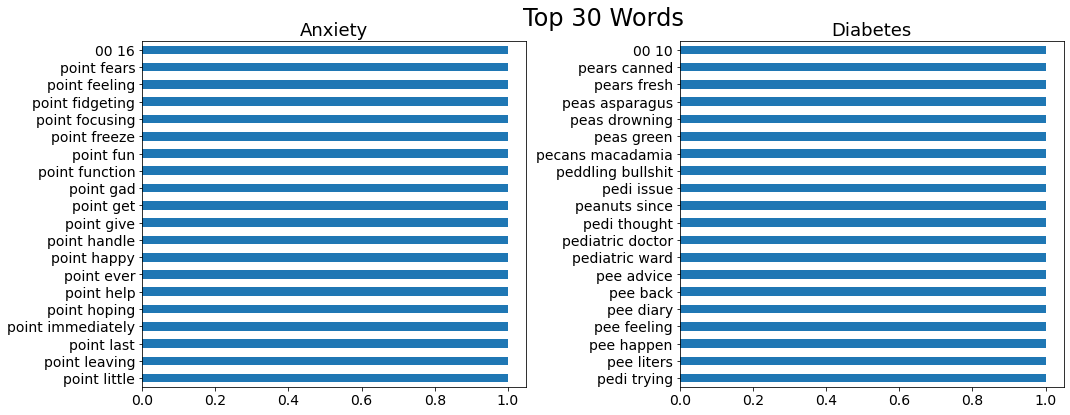

In [591]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
anx_vect_df.sum().sort_values(ascending=True).head(20).plot(kind='barh', ax=ax[0], fontsize=14)
dia_vect_df.sum().sort_values(ascending=True).head(20).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('Anxiety', fontsize=18)
ax[1].set_title('Diabetes', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 30 Words', fontsize=24)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

Words like feel, help, panic, anxious, bad, never, were cast as prevalent and important. Such as ‘panic attack’, ‘side effects’, ‘heart rate’, ‘intrusive thoughts’ for coupled Anxiety words are concerning.
Diabetes has a confident feel towards language, where solution words are most often used. As, insulin, type, doctor, feel used on a lower basis, work, carbs, glucose, diagnosed. For coupled words, words like came back, sugar levels, acting insulin, side effects are all words indicative of different maturity towards their conditions, greater understanding of their symptoms. Where subreddit is used more to share your experience, than crying for help.

### Look at post overlap, how are they overlapping?

Research says diabetes and aniety are correlated, does social media reflect this correlation?

In [598]:
top_words_anx = ['anxious', 'feel', 'get', 'help', 'bad', 'work', 'feeling', 'panic', 'never', 'always', 'try', 'years']
couple_words_anx = ['panic attacks', 'anyone else', 'mental health', 'years ago', 'months ago', 'feel better', 'side effects', 'get anxious', 'heart rate', 'physical symptoms', 'need help', 'intrusice thoughts', 'please help', 'fall asleep', 'heart attack', 'get better']

top_words_dia = ['insulin', 'blood', 'sugar', 'type', 'low', 'eat', 'doctor', 'high', 'help', 'diagnosed', 'feel', 'test', 'work', 'well', 'see', 'carbs']
couple_words_dia = ['blood sugar', 'blood glucose', 'anyone else', 'diagnosed type', 'last year', 'blood test', 'came back', 'sugar levels', 'year old', 'acting insulin', 'long term', 'side effects', 'long acting', 'insulin resistance', 'weight loss', 'recently diagnosed']

In [593]:
top_50_anx = anx_vect_df.sum().sort_values(ascending=False).head(50)
top_50_dia = dia_vect_df.sum().sort_values(ascending=False).head(50)

In [594]:
top_50_anx

pop lt                251
gt pop                251
lt gt                 251
panic attack          123
panic attacks         100
anyone else            96
mental health          45
years ago              40
months ago             39
feel better            39
side effects           37
get anxious            35
heart rate             34
physical symptoms      31
makes feel             27
last night             27
need help              27
last year              26
intrusive thoughts     24
gt gt                  23
many times             23
feeling anxious        22
please help            22
year old               22
get better             21
little bit             21
heart palpitations     21
fall asleep            21
heart attack           20
someone else           20
two weeks              19
weeks ago              19
feel bad               19
whole life             19
ever since             18
came back              17
good luck              17
last week              17
feel guilty 

In [595]:
top_50_dia

blood sugar           229
low carb               74
blood glucose          57
anyone else            53
blood sugars           48
diagnosed type         39
mg dl                  32
last year              31
blood test             31
last night             29
came back              26
sugar levels           25
type diabetic          24
reddit comments        23
year old               23
years ago              21
hi everyone            21
acting insulin         21
low blood              21
hours later            20
long term              20
side effects           19
last week              19
long acting            18
insulin resistance     18
weight loss            17
pre diabetic           17
test strips            17
freestyle libre        17
recently diagnosed     17
insulin pump           17
wondering anyone       17
dexcom g6              16
diet exercise          16
years old              16
see doctor             16
fast food              16
fast acting            16
sugar free  

In [596]:
#compare = top_50_anx.compare(top_50_dia)
    

### Take Aways:
Overlapping coupled words such as ‘anyone else’, ‘need help’, ‘side effects’. 
Overlapping coupled time related words: ‘last night’, ‘years ago’ are significant to understand how it’s a daily struggle with their conditions and long lasting.
They are in different time stages:
One has already initialized their process of recovery in a way. Was already pre-diagnosed, clear understanding of their conditions, already initialized their process of recovery in a way.  On anxiety point of view they are more confused, looking for help and assistance. 

#### I also looked at the least used words, but they were too broad, maybe I should look at least coupled used

### In terms of time:
Interesting things to notice is:
anxiety top time words are :
years ago, as 9th
month ago as 10th

Diabetes top time words are:
last year as 7th
last night 9th
years ago as 15th
hours later 19th
last week 22th

### This contradicts my first preconception on word counts:
I thought anxiety would have a considerable amount of words larger than diabetes. For the mere preconception that people with anxiety would want to rant and vent in the internet more often. There is a difference of an average of 77 words to 105 words, which is notable.